In [3]:
from generate_grid.generate_grid import generate_sudoku
from generate_grid.generate_grid import is_valid
from implems.constraint import solve_sudoku_constraint
from implems.backtrack import solve_sudoku_backtracking
from utils.utils import process_sudoku_file
import time

In [4]:
# Initialisation des variables de test

nb_tests = 150
difficulty = 3

In [5]:
# Test solvers with random generated grids 

ok_constraint_tests = 0
ok_backtracking_tests = 0

time_constraint_tests = []
time_backtracking_tests = []

for i in range(nb_tests):
    # Generate a sudoku grid
    grid = generate_sudoku(difficulty)

    # Solve the sudoku grid using the constraint solver
    start = time.time()
    solution = solve_sudoku_constraint(grid)
    end = time.time()
    time_constraint_tests.append(end - start)

    # Solve the sudoku grid using the backtracking solver
    start = time.time()
    solution = solve_sudoku_backtracking(grid)
    end = time.time()
    time_backtracking_tests.append(end - start)


In [6]:
# Time comparative
print(len(time_constraint_tests))

average_time_constraint = sum(time_constraint_tests) / len(time_constraint_tests)
average_time_backtracking = sum(time_backtracking_tests) / len(time_backtracking_tests)

print("Average time for constraint solver: ", average_time_constraint)
print("Average time for backtracking solver: ", average_time_backtracking)

time_constraint_tests = []
time_backtracking_tests = []

150
Average time for constraint solver:  0.00983133316040039
Average time for backtracking solver:  0.005546673138936361


In [7]:
file_grids = process_sudoku_file("test.txt")

for grid in file_grids: 
    # Solve the sudoku grid using the constraint solver
    start = time.time()
    solution = solve_sudoku_constraint(grid)
    end = time.time()
    time_constraint_tests.append(end - start)

    # Solve the sudoku grid using the backtracking solver
    start = time.time()
    solution = solve_sudoku_backtracking(grid)
    end = time.time()
    time_backtracking_tests.append(end - start)

In [8]:
# Time comparative

print(len(time_constraint_tests))

average_time_constraint = sum(time_constraint_tests) / len(time_constraint_tests)
average_time_backtracking = sum(time_backtracking_tests) / len(time_backtracking_tests)

print("Average time for constraint solver: ", average_time_constraint)
print("Average time for backtracking solver: ", average_time_backtracking)




50
Average time for constraint solver:  0.024618759155273437
Average time for backtracking solver:  0.2775717687606811


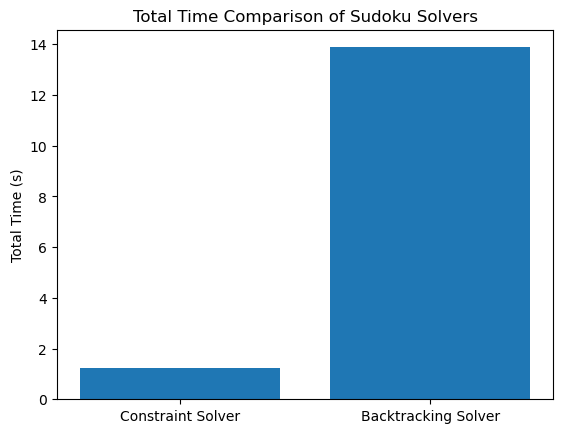

In [9]:
# plot un graphique avec deux courbes qui represente les valeurs des tableau average_time_constraint et average_time_backtracking
import matplotlib.pyplot as plt

plt.bar(['Constraint Solver', 'Backtracking Solver'], [sum(time_constraint_tests), sum(time_backtracking_tests)])
plt.ylabel('Total Time (s)')
plt.title('Total Time Comparison of Sudoku Solvers')
plt.show()



In [11]:
file_grids = process_sudoku_file("hard_test.txt")

for grid in file_grids: 
    # Solve the sudoku grid using the constraint solver
    start = time.time()
    solution = solve_sudoku_constraint(grid)
    end = time.time()
    time_constraint_tests.append(end - start)

    # Solve the sudoku grid using the backtracking solver
    start = time.time()
    solution = solve_sudoku_backtracking(grid)
    end = time.time()
    time_backtracking_tests.append(end - start)

In [12]:
# Time comparative

print(len(time_constraint_tests))

average_time_constraint = sum(time_constraint_tests) / len(time_constraint_tests)
average_time_backtracking = sum(time_backtracking_tests) / len(time_backtracking_tests)

print("Average time for constraint solver: ", average_time_constraint)
print("Average time for backtracking solver: ", average_time_backtracking)


443
Average time for constraint solver:  2.0175666696061936
Average time for backtracking solver:  3.8890643249270065


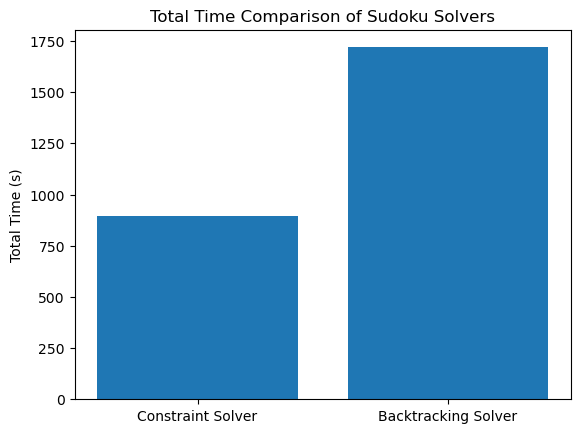

In [13]:

plt.bar(['Constraint Solver', 'Backtracking Solver'], [sum(time_constraint_tests), sum(time_backtracking_tests)])
plt.ylabel('Total Time (s)')
plt.title('Total Time Comparison of Sudoku Solvers')
plt.show()


In [14]:
from implems.norvig import solve_sudoku_norvig
from implems.mrv import solve_sudoku_mrv
from implems.dlx import solve_sudoku_dlx
from implems.genetic import solve_sudoku_genetic
import pandas as pd

In [15]:
def test_all_solvers(grid):
    """
    Teste tous les solveurs disponibles sur une grille donnée et retourne leurs temps d'exécution.
    
    Args:
        grid: Une grille de Sudoku 9x9 représentée comme une liste de listes.
        
    Returns:
        Un dictionnaire des temps d'exécution pour chaque solveur.
    """
    solvers = {
        "Backtracking": solve_sudoku_backtracking,
        "Constraint": solve_sudoku_constraint,
        "Norvig": solve_sudoku_norvig,
        "MRV": solve_sudoku_mrv,
        "DLX": solve_sudoku_dlx
        # Note: Le solveur génétique est souvent beaucoup plus lent et moins fiable,
        # donc nous pouvons le tester séparément
    }
    
    times = {}
    for name, solver in solvers.items():
        start = time.time()
        solution = solver(grid)
        end = time.time()
        times[name] = end - start
    
    return times

In [18]:
def run_benchmark(num_grids=10):
    """
    Exécute un benchmark de tous les solveurs sur plusieurs grilles générées aléatoirement.
    
    Args:
        num_grids: Nombre de grilles à tester.
        
    Returns:
        Un DataFrame avec les résultats du benchmark.
    """
  

    results = []
    
    # Tester sur des grilles générées aléatoirement
    file_grids = process_sudoku_file("test.txt")
    for grid in file_grids:
        times = test_all_solvers(grid)
        times["Grid"] = len(results) + 1
        results.append(times)

    # Convertir en DataFrame
    df = pd.DataFrame(results)
    
    # Réorganiser les colonnes pour avoir 'Grid' en premier
    cols = df.columns.tolist()
    cols.remove("Grid")
    cols = ["Grid"] + cols
    df = df[cols]
    
    return df

In [19]:
benchmark_results = run_benchmark(10)
print(benchmark_results)

    Grid  Backtracking  Constraint    Norvig       MRV       DLX
0      1      0.006600    0.032529  0.017147  0.014548  0.023765
1      2      0.002613    0.011390  0.005541  0.006315  0.015966
2      3      0.233393    0.011811  0.005644  0.013732  0.019347
3      4      0.017945    0.039955  0.011411  0.007966  0.034357
4      5      0.001300    0.013242  0.007912  0.006989  0.029862
5      6      0.937223    0.021910  0.006109  0.061399  0.056181
6      7      0.096856    0.041914  0.015107  0.014968  0.022340
7      8      0.000600    0.007946  0.005425  0.004098  0.016196
8      9      1.697680    0.061952  0.005497  0.066259  0.047068
9     10      0.098457    0.025447  0.020702  0.037750  0.018982
10    11      0.286746    0.082543  0.005801  0.006675  0.016562
11    12      0.009638    0.007740  0.004844  0.004748  0.015382
12    13      2.904159    0.011134  0.004923  0.008540  0.016458
13    14      0.676082    0.085310  0.005322  0.028227  0.016955
14    15      0.042158   

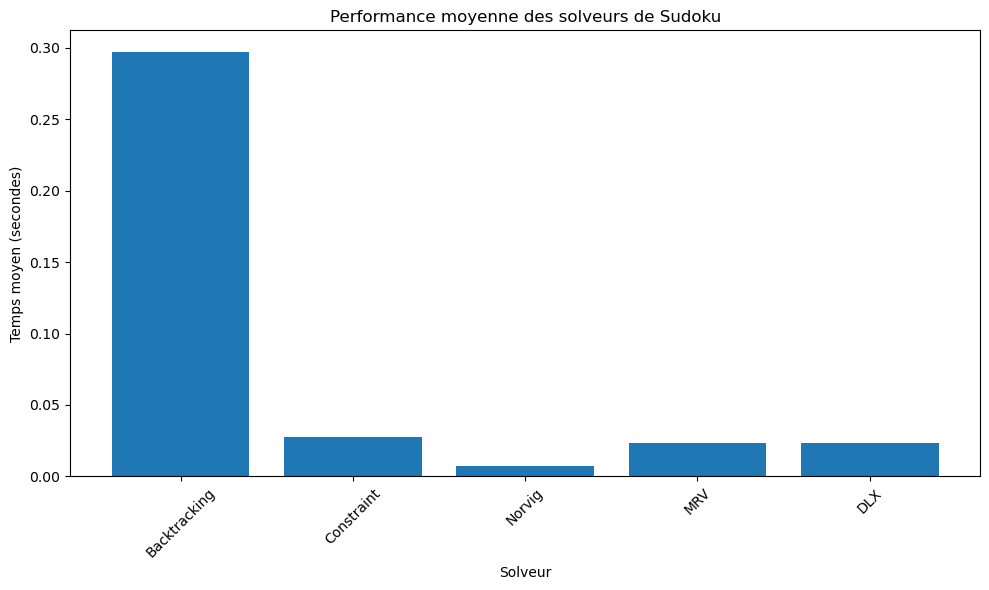

In [20]:
import matplotlib.pyplot as plt

# Calculer les temps moyens par solveur
average_times = benchmark_results.drop("Grid", axis=1).mean()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(average_times.index, average_times.values)
plt.xlabel('Solveur')
plt.ylabel('Temps moyen (secondes)')
plt.title('Performance moyenne des solveurs de Sudoku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:

print("\nTest sur des grilles difficiles:")
hard_grids = process_sudoku_file("hard_test.txt")
hard_results = []

# Prendre seulement quelques grilles difficiles pour économiser du temps
for i, grid in enumerate(hard_grids[:5]):
    times = test_all_solvers(grid)
    times["Grid"] = f"Hard {i + 1}"
    hard_results.append(times)

hard_df = pd.DataFrame(hard_results)
cols = hard_df.columns.tolist()
cols.remove("Grid")
cols = ["Grid"] + cols
hard_df = hard_df[cols]

print(hard_df)


Test sur des grilles difficiles:
     Grid  Backtracking  Constraint    Norvig       MRV       DLX
0  Hard 1     19.959585    0.099932  0.248337  4.137802  0.178673
1  Hard 2      2.306946    1.147437  0.008802  0.129662  0.045158
2  Hard 3     11.699459    0.118697  0.095628  3.243914  0.082312
3  Hard 4     25.213883    1.476113  0.210308  6.913170  0.154249
4  Hard 5      1.669810    4.357923  0.022056  0.651492  0.032844


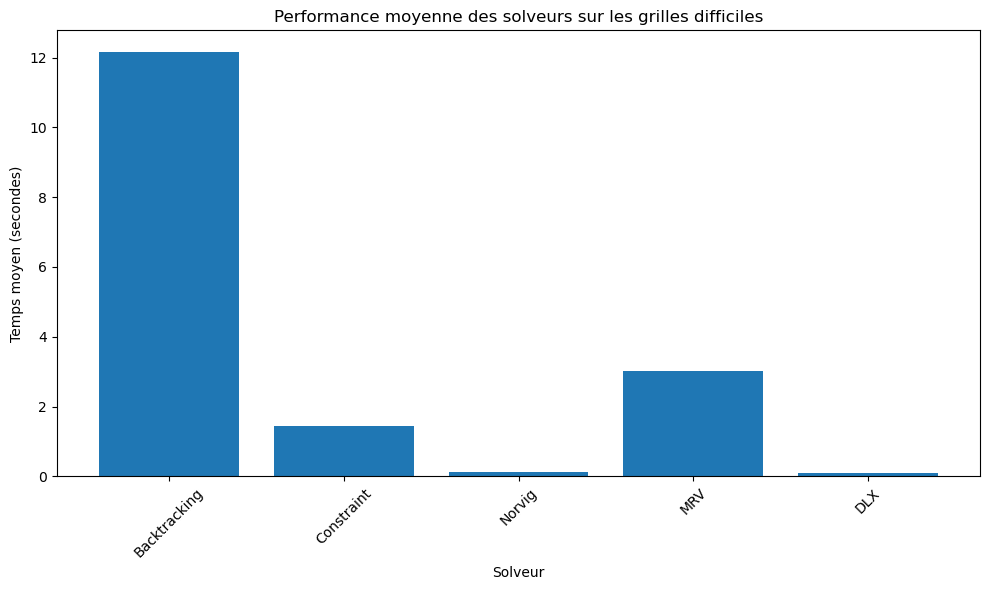

In [23]:
plt.figure(figsize=(10, 6))
avg_hard_times = hard_df.drop("Grid", axis=1).mean()
plt.bar(avg_hard_times.index, avg_hard_times.values)
plt.xlabel('Solveur')
plt.ylabel('Temps moyen (secondes)')
plt.title('Performance moyenne des solveurs sur les grilles difficiles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()